# 🟢 Redundancy-Aware Sensor Fusion with Drift Detection (Toy Demo)

## 📌 What it does
- We simulate three sensors measuring the same signal (like room temperature).
- After some time, one sensor starts drifting (slowly giving wrong values).
- We show how fusion (combining multiple sensors) makes the system more robust.
- We also show how to detect the faulty sensor using residuals and agreement checks.

## ⚙️ How it works
- **True signal**: a smooth sine wave representing the real value.
- **Sensors**: each = true signal + small random noise.
- **Drift**: one sensor gets a slow upward error after a chosen time step.
- **Fusion**:
  - *Mean fusion* → average of the 3 sensors.
  - *Weighted fusion* → sensors that disagree with the others get lower weight.
- **Drift detection**:
  - *Residuals* = difference between each sensor and fused value → large residuals mean drift.
  - *Agreement score* = how much each sensor matches the others → a drifting sensor’s score drops.

## 📊 What we expect in the results
- At first, all sensors agree, and both mean and weighted fusion are accurate.
- Once drift starts, the faulty sensor pulls the mean upwards.
- Weighted fusion stays closer to the truth because it down-weights the drifter.
- Drift detection flags the faulty sensor using residual z-scores and agreement.

## 🌟 Why it matters
- Redundancy is not wasteful — it makes systems more robust.
- We can use redundancy to detect faulty or drifting sensors.
- This demo is inspired by redundancy-aware systems research.


In [1]:
# Step 1: simulate latent signal + 3 sensors (with drift on one sensor)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make plots bigger
plt.rcParams['figure.figsize'] = (9, 3)

# reproducibility
np.random.seed(42)

# number of time steps
n = 800
t = np.arange(n)

# latent (true) signal: smooth sine wave + small trend + noise
latent = 0.5 * np.sin(2 * np.pi * t / 200.0) + 0.002 * t + 0.1 * np.random.randn(n)

# sensor noises (different quality levels)
sigma_A, sigma_B, sigma_C = 0.25, 0.15, 0.20
A = latent + sigma_A * np.random.randn(n)
B = latent + sigma_B * np.random.randn(n)
C = latent + sigma_C * np.random.randn(n)

# inject drift into sensor C starting at t=700
k0, drift_rate = 700, 0.003
bias = np.zeros(n)
bias[k0:] = drift_rate * np.arange(n - k0)
C = C + bias

# put everything into a dataframe for convenience
data = pd.DataFrame({
    "t": t,
    "latent": latent,
    "A": A,
    "B": B,
    "C": C,
    "bias": bias
})

# quick peek at first few rows
data.head()


,t,latent,A,B,C,bias
0,0,0.049671,0.284242,0.022237,-0.094676,0.0
1,1,0.003879,-0.125132,0.210110,0.039243,0.0
2,2,0.100164,0.124194,0.003269,-0.009172,0.0
3,3,0.205357,0.089788,0.085478,0.151026,0.0
4,4,0.047251,-0.061373,-0.025160,0.381942,0.0


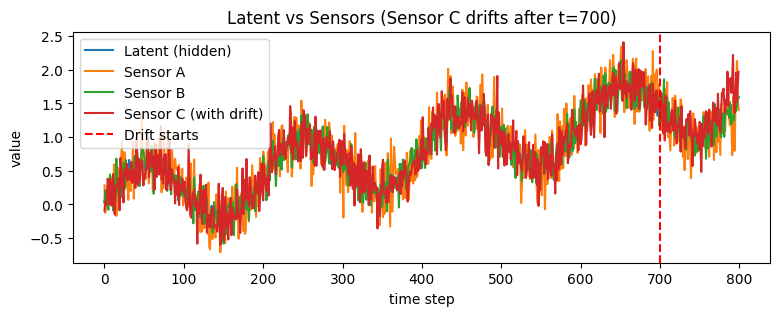

In [2]:
# Step 2: plot latent signal vs. all three sensors

plt.figure()
plt.plot(data.t, data.latent, label="Latent (hidden)")
plt.plot(data.t, data.A, label="Sensor A")
plt.plot(data.t, data.B, label="Sensor B")
plt.plot(data.t, data.C, label="Sensor C (with drift)")
plt.axvline(x=700, linestyle="--", color="red", label="Drift starts")
plt.legend()
plt.title("Latent vs Sensors (Sensor C drifts after t=700)")
plt.xlabel("time step")
plt.ylabel("value")
plt.show()
